Example notebook showing how to use the nested sampler

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import logging

In [2]:
logging.disable(logging.INFO)

In [3]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [4]:
from nnest import NestedSampler, MCMCSampler
from nnest.likelihoods import *
from nnest.priors import *

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# Likelihood + prior
like = Himmelblau(2)
transform = lambda x: 5*x
prior = UniformPrior(2, -5, 5)
#like = Rosenbrock(2)
#transform = lambda x: 5*x
#prior = UniformPrior(2, -2, 5)
#prior = UniformPrior(4, -2, 5)
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
#like = Eggbox(2)
#transform = lambda x: 5*np.pi*x
#like = GaussianShell(2)
#transform = lambda x: 3*x
#prior = UniformPrior(2, -3, 3)
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [7]:
sampler = NestedSampler(like.x_dim, like, transform=transform, num_live_points=100, hidden_dim=16, num_blocks=3, flow='spline')

Creating directory for new run logs/test/run24


In [8]:
sampler.run(mcmc_steps=like.x_dim)

In [9]:
print(sampler.logz)

-4.9044448860744225


In [10]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=-sampler.loglikes)

Removed no burn in


In [11]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.likeStats)

301.40916047267046
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      1.7818271E+00  2.8902759E+00 -3.8412137E+00  3.7589240E+00  two   -3.9390980E+00  3.8073827E+00  two   -3.9229634E+00  3.7825069E+00  two     p_{1}
param2     -4.1441488E-01  2.2249839E+00 -3.3232058E+00  2.1782151E+00  two   -3.3454654E+00  3.1537730E+00  two   -3.6000981E+00  3.4598661E+00  two     p_{2}

Best fit sample -log(Like) = 0.000339
mean(-Ln(like)) = 0.931009
-Ln(mean like)  = 0.654090

parameter   bestfit        lower1         upper1         lower2         upper2
param1     -2.8075400E+00 -3.8928497E+00  3.7074730E+00 -3.9421228E+00  3.7825069E+00   p_{1}
param2      3.1332752E+00 -3.3656064E+00  3.2509467E+00 -3.4821540E+00  3.3581948E+00   p_{2}



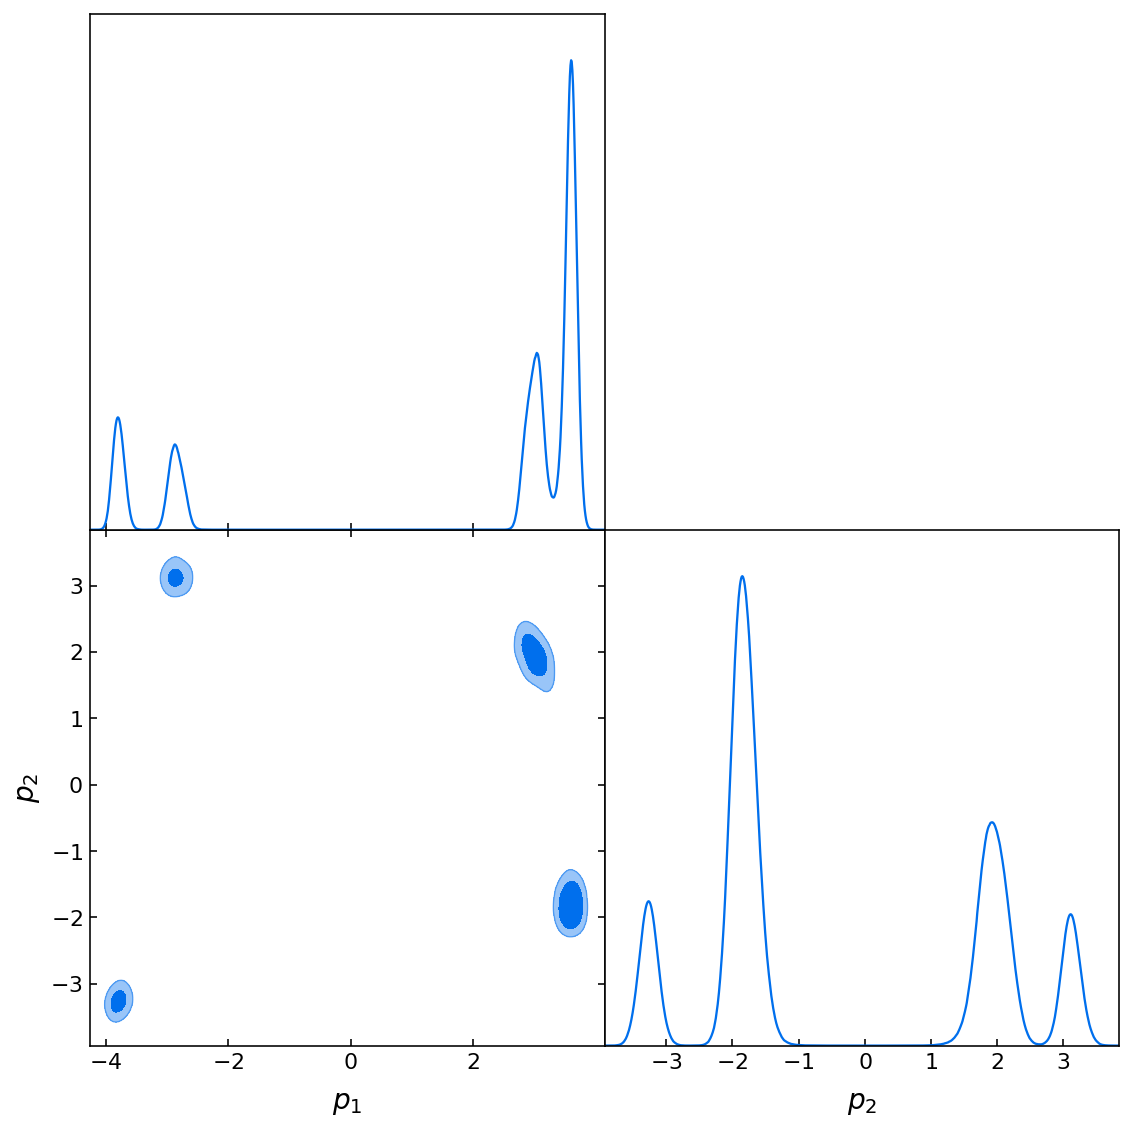

In [12]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)

In [13]:
init_samples = mc.makeSingleSamples()

In [14]:
init_samples.shape

(247, 2)

In [15]:
sampler = MCMCSampler(like.x_dim, like, hidden_dim=16, num_blocks=3, flow='spline', prior=prior, run_num=1)

In [16]:
sampler.run(init_samples=init_samples, bootstrap_iters=0)

ncall: 16957



In [17]:
samples = [sampler.samples[i, :, :].squeeze() for i in range(sampler.samples.shape[0])]
latent_samples = [sampler.latent_samples[i, :, :].squeeze() for i in range(sampler.latent_samples.shape[0])]
loglikes = [sampler.loglikes[i, :].squeeze() for i in range(sampler.loglikes.shape[0])]

In [18]:
mc = MCSamples(samples=samples, loglikes=loglikes)

Removed no burn in


In [19]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.getConvergeTests())

1049.855736155958
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      6.1537179E-01  3.2600791E+00 -3.8907804E+00  3.7220273E+00  two   -4.0005771E+00  3.7948668E+00  two   -4.0107169E+00  3.7900070E+00  two     p_{1}
param2      8.4308129E-02  2.5240049E+00 -3.4217030E+00  3.2623186E+00  two   -3.5263785E+00  3.3607886E+00  two   -3.4993140E+00  3.3364136E+00  two     p_{2}

Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)

            Weight Length   Sample length           N_eff
param1           2.33E+01           23.35            1070
param2           4.25E+01           42.52             588


mean convergence stats using remaining chains
param sqrt(var(chain mean)/mean(chain var))

param1        0.0814  p_{1}
param2        0.1038  p_{2}

var(mean)/mean(var) for eigenvalues of covaria

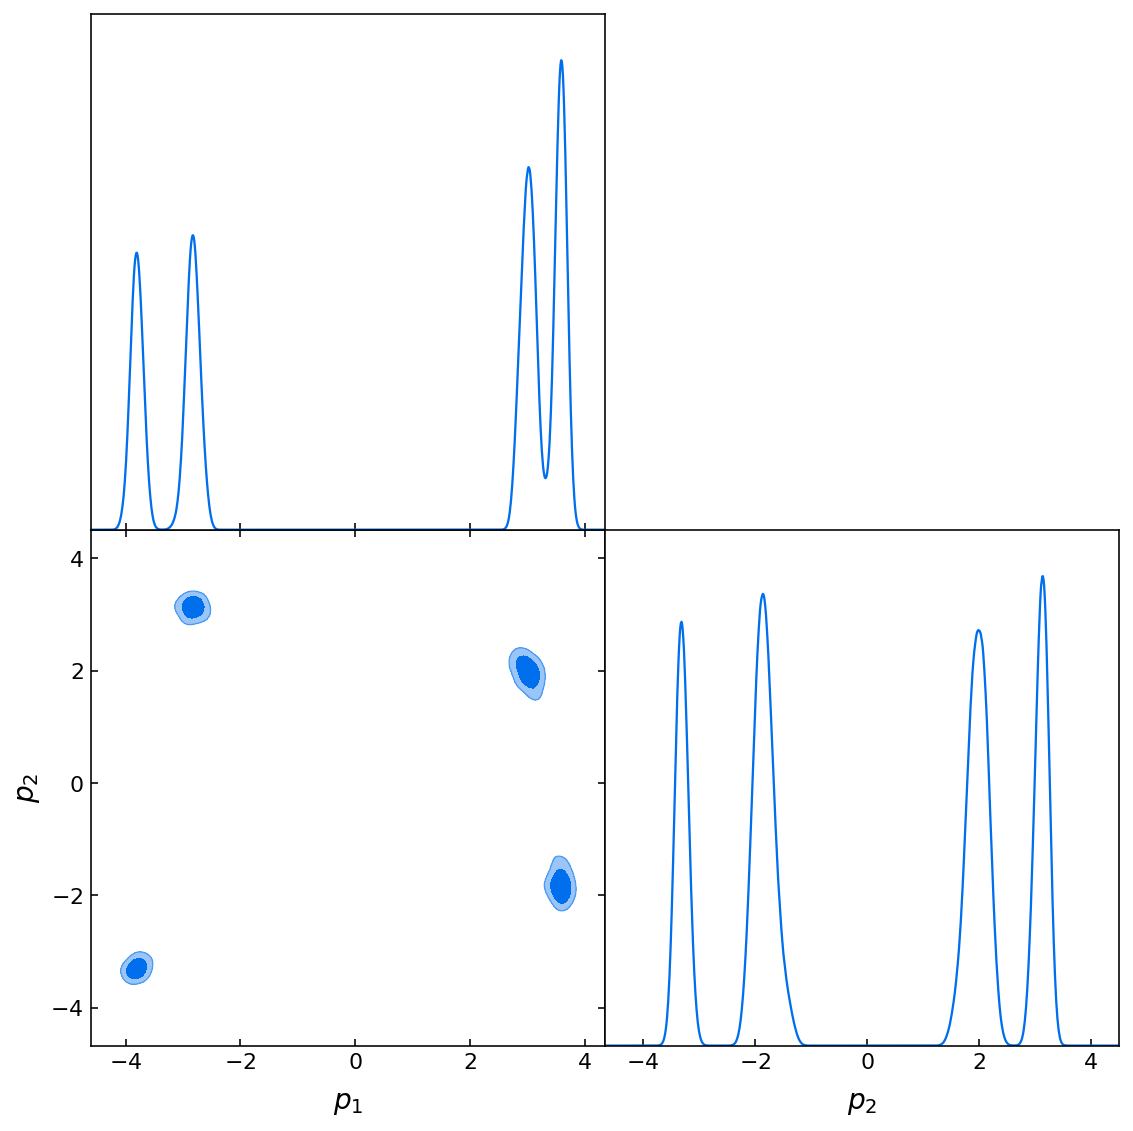

In [20]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)

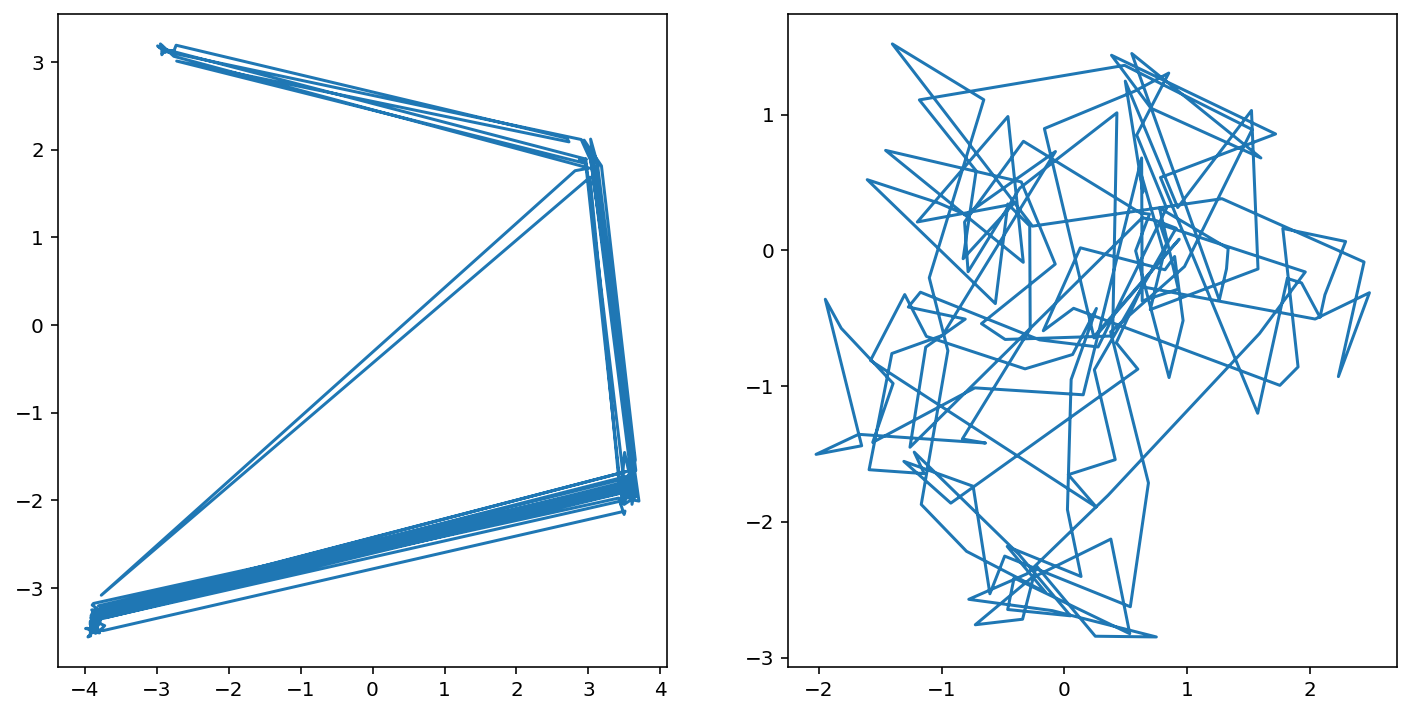

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(samples[0][2000:2500,0], samples[0][2000:2500,1])
ax[1].plot(latent_samples[0][500:1000,0], latent_samples[0][500:1000,1])
plt.show()

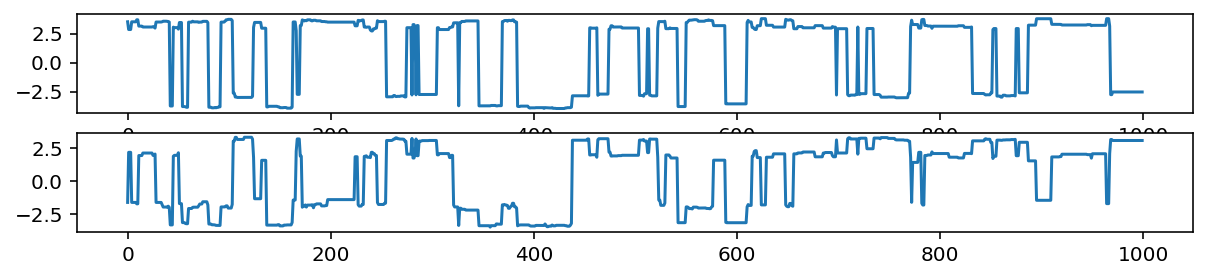

In [22]:
fig, ax = plt.subplots(like.x_dim, 1, figsize=(10, like.x_dim))
for i in range(like.x_dim):
    ax[i].plot(samples[0][500:1500,i])
plt.show()